## YOLO v8 모델 사용

In [1]:
# 라이브러리 불러오기
import os
import random
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# GPU 설정
DEVICE = 0 if torch.cuda.is_available() else 'cpu'
print(f"✅ 사용 디바이스: {DEVICE}")

✅ 사용 디바이스: 0


In [2]:
# 경로 설정
PHOTO_DATA_PATH = "/workspace/datasets/dataset2yolo/photo"
DRAWING_DATA_PATH = "/workspace/datasets/dataset2yolo/drawing"
PRETRAINED_MODEL_PATH = "/workspace/models/photo_pretrained_yolov8x.pt"
FINAL_MODEL_PATH = "/workspace/models/drawing_finetuned_yolov8x.pt"

# 하이퍼파라미터
EPOCHS_PHOTO = 10
EPOCHS_DRAWING = 200
BATCH_SIZE = 32
IMG_SIZE = 224
LR = 1e-4
PATIENCE = 7

model = YOLO("/workspace/models/yolov8x-cls.pt")

In [4]:
# 1️⃣ Step 1 - 사진 데이터로 사전학습
print("\n🔵 Step 1: 사진 데이터로 분류 모델 학습")

results1 = model.train(
    data=PHOTO_DATA_PATH,
    epochs=EPOCHS_PHOTO,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    lr0=LR,
    patience=3,
    device=DEVICE
)

# 모델 저장
model.save(PRETRAINED_MODEL_PATH)
print(f"📁 사진 기반 사전학습 모델 저장 완료: {PRETRAINED_MODEL_PATH}")


🔵 Step 1: 사진 데이터로 분류 모델 학습
New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'


Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.7.1+cu118 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20147MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/datasets/dataset2yolo/photo, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/workspace/models/yolov8x-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train21, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

train: Scanning /workspace/datasets/dataset2yolo/photo/train... 5756 images, 0 corrupt: 100%|██████████| 5756/5756 [00:00<?, ?it/s]

train: /workspace/datasets/dataset2yolo/photo/train/angry/00hj57bc2be60739b1b9f99316a3a11de5febe993b093876bb33d7bab900006ts.jpg: corrupt JPEG restored and saved
train: /workspace/datasets/dataset2yolo/photo/train/angry/00ll57ed4d58f3e6c766e65168fc704d9e43ca0b1de8dba8927517b474f083s8x.jpg: corrupt JPEG restored and saved
train: /workspace/datasets/dataset2yolo/photo/train/angry/013320f6c6aa0752eb2933111106c9bcbfaaf62b4168626b0a1f3288836bf1n3l.jpg: corrupt JPEG restored and saved
train: /workspace/datasets/dataset2yolo/photo/train/angry/05bm462b58f3e2803222f677525c32f112fd1c5b753346a01f228e9b026657qhq.jpg: corrupt JPEG restored and saved
train: /workspace/datasets/dataset2yolo/photo/train/angry/0aul95639d66c4bb678bac9c296566384c4708131675d709f62071c2913728q1y.jpg: corrupt JPEG restored and saved
train: /workspace/datasets/dataset2yolo/photo/train/angry/0dji06c60ccea88d675db12142cb60f621c567c876b97fd6aa39be04e26e69x8l.jpg: corrupt JPEG restored and saved
train: /workspace/datasets/dataset

val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 255.0±60.5 MB/s, size: 3006.0 KB)


val: Scanning /workspace/datasets/dataset2yolo/photo/val... 1440 images, 0 corrupt: 100%|██████████| 1440/1440 [00:00<?, ?it/s]

val: /workspace/datasets/dataset2yolo/photo/val/angry/03nf73f4eb25c42388b21c54304c809be3fed9c8815eb252603b90def95e3b41o.jpg: corrupt JPEG restored and saved
val: /workspace/datasets/dataset2yolo/photo/val/angry/0dwf6b2165808a89884760257a16286250ccee86777193517af26ef1221fc9zuc.jpg: corrupt JPEG restored and saved
val: /workspace/datasets/dataset2yolo/photo/val/angry/0l2p97bad5fdff430cc182d951376bd55c2760aa0083c3583166245bdaca231y7.jpg: corrupt JPEG restored and saved
val: /workspace/datasets/dataset2yolo/photo/val/angry/1cqh9a1945b0a17b5beb902de374ffe5e54f1b4b3be514eebc3fe755abb0ajjzk.jpg: corrupt JPEG restored and saved
val: /workspace/datasets/dataset2yolo/photo/val/angry/1lty698d2a73458ad2d1ead3f97287a86999f2957b2af628ca7120ccd75fdibf6.jpg: corrupt JPEG restored and saved
val: /workspace/datasets/dataset2yolo/photo/val/angry/1p08dc6ec9739a853b3e7e6bca891a7734c4791317a4d9abcfb4cdfafb34dp00p.jpg: corrupt JPEG restored and saved
val: /workspace/datasets/dataset2yolo/photo/val/angry/1sm2

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train21
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]

                   all      0.753          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]

                   all      0.733          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:07<00:00,  3.12it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:07<00:00,  3.17it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]

                   all      0.879          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      3.46G      0.255         28        224: 100%|██████████| 180/180 [01:15<00:00,  2.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:08<00:00,  2.87it/s]

                   all      0.892          1



10 epochs completed in 0.243 hours.
Optimizer stripped from runs/classify/train21/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/train21/weights/best.pt, 112.5MB

Validating runs/classify/train21/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.7.1+cu118 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20147MiB)
YOLOv8x-cls summary (fused): 54 layers, 56,128,324 parameters, 0 gradients, 153.8 GFLOPs
train: /workspace/datasets/dataset2yolo/photo/train... found 5756 images in 4 classes ✅ 
val: /workspace/datasets/dataset2yolo/photo/val... found 1440 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:16<00:00,  1.41it/s]


                   all      0.892          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train21
📁 사진 기반 사전학습 모델 저장 완료: /workspace/models/photo_pretrained_yolov8x.pt


In [5]:
# 2️⃣ Step 2 - 그림 데이터로 파인튜닝 (사진 모델 이어서)
print("\n🟣 Step 2: 그림 데이터로 파인튜닝")

# 이전 학습된 모델 불러오기
model2 = YOLO(PRETRAINED_MODEL_PATH)

results2 = model2.train(
    data=DRAWING_DATA_PATH,
    epochs=EPOCHS_DRAWING,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    patience=PATIENCE,
    device=DEVICE,
    # 데이터 증강 설정
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.0,  # 분류 태스크에서는 mosaic 비활성화
    mixup=0.1,
    copy_paste=0.0
)

# 파인튜닝 모델 저장
model2.save(FINAL_MODEL_PATH)
print(f"📁 파인튜닝된 모델 저장 완료: {FINAL_MODEL_PATH}")


🟣 Step 2: 그림 데이터로 파인튜닝


New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.7.1+cu118 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20147MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/datasets/dataset2yolo/drawing, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/workspace/models/photo_pretrained_yolov8x.pt, momentum=0.937, mosaic=0.0, multi_sca

train: Scanning /workspace/datasets/dataset2yolo/drawing/train... 1539 images, 0 corrupt: 100%|██████████| 1539/1539 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 10.4±3.8 MB/s, size: 30.6 KB)


val: Scanning /workspace/datasets/dataset2yolo/drawing/val... 472 images, 0 corrupt: 100%|██████████| 472/472 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train22
Starting training for 200 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/200      4.03G       1.79          3        224: 100%|██████████| 49/49 [00:06<00:00,  7.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.20it/s]

                   all      0.614          1



      Epoch    GPU_mem       loss  Instances       Size


      2/200      4.46G      1.005          3        224: 100%|██████████| 49/49 [00:04<00:00, 10.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.26it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


      3/200      4.46G     0.8667          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.05it/s]

                   all      0.744          1



      Epoch    GPU_mem       loss  Instances       Size


      4/200      4.46G     0.8204          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.23it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


      5/200      4.46G     0.7931          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.15it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


      6/200      4.49G      0.715          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.18it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      7/200       4.5G     0.6592          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.23it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


      8/200      4.89G     0.6103          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.23it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      9/200      5.12G     0.5409          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.22it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


     10/200       5.5G     0.5624          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.16it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     11/200       5.5G     0.5377          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.87it/s]

                   all      0.811          1



      Epoch    GPU_mem       loss  Instances       Size


     12/200       5.5G     0.5863          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.09it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


     13/200       5.5G     0.5173          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.02it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


     14/200       5.5G      0.407          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.96it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     15/200       5.5G      0.449          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.97it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     16/200       5.5G     0.4845          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.99it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


     17/200       5.5G     0.4497          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.06it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     18/200       5.5G      0.437          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.82it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     19/200       5.5G     0.3687          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.11it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     20/200       5.5G     0.3984          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.03it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


     21/200       5.5G     0.4349          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.18it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     22/200       5.5G     0.3821          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 22.05it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     23/200      5.52G     0.3376          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.88it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


     24/200      5.86G     0.3147          3        224: 100%|██████████| 49/49 [00:04<00:00, 11.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 21.87it/s]

                   all      0.858          1
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



24 epochs completed in 0.053 hours.
Optimizer stripped from runs/classify/train22/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/train22/weights/best.pt, 112.5MB

Validating runs/classify/train22/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.7.1+cu118 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20147MiB)
YOLOv8x-cls summary (fused): 54 layers, 56,128,324 parameters, 0 gradients, 153.8 GFLOPs
train: /workspace/datasets/dataset2yolo/drawing/train... found 1539 images in 4 classes ✅ 
val: /workspace/datasets/dataset2yolo/drawing/val... found 472 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:00<00:00, 23.14it/s]


                   all      0.862          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train22
📁 파인튜닝된 모델 저장 완료: /workspace/models/drawing_finetuned_yolov8x.pt


In [3]:
# 파인튜닝된 모델 로드
print("🔵 파인튜닝된 모델 로드 중...")
model = YOLO(FINAL_MODEL_PATH)
model.fuse()

# 클래스 이름 확인
class_names = model.names
print(f"📋 클래스 수: {len(class_names)}")
print(f"📋 클래스 이름: {list(class_names.values())}")

# 예측할 이미지 폴더 설정
image_dir = os.path.join(DRAWING_DATA_PATH, "val")

# 폴더 존재 여부 확인
if not os.path.exists(image_dir):
    print(f"❌ val 폴더가 존재하지 않습니다: {image_dir}")
    exit()

print(f"📁 이미지 경로: {image_dir}")

# 모든 이미지 경로 수집
all_images = []
class_counts = {}

try:
    for cls in os.listdir(image_dir):
        cls_path = os.path.join(image_dir, cls)
        if os.path.isdir(cls_path):
            img_files = [f for f in os.listdir(cls_path) 
                        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
            
            class_counts[cls] = len(img_files)
            print(f"🔍 클래스 '{cls}': {len(img_files)}장 수집")
            
            for img_name in img_files:
                img_path = os.path.join(cls_path, img_name)
                all_images.append((img_path, cls))
    
    total_images = len(all_images)
    print(f"✅ 총 {total_images}장의 이미지 수집 완료")
    
except Exception as e:
    print(f"❌ 이미지 수집 중 오류: {e}")
    exit()

# 이미지가 있는지 확인
if len(all_images) == 0:
    print("❌ 예측할 이미지가 없습니다!")
    exit()

print(f"🎯 전체 {total_images}장 이미지로 성능 평가 진행")

# 클래스별 예측 결과 저장
from collections import defaultdict
class_results = defaultdict(lambda: {'correct': 0, 'total': 0, 'predictions': []})

correct_predictions = 0
total_predictions = 0

# 모든 이미지에 대해 예측 수행
for idx, (img_path, true_label) in enumerate(all_images):
    try:
        # 모델 예측
        result = model.predict(source=img_path, imgsz=IMG_SIZE, conf=0.0, verbose=False)[0]
        
        # 예측 결과 추출
        if hasattr(result, 'probs') and result.probs is not None:
            pred_idx = int(result.probs.top1)
            pred_label = class_names[pred_idx]
            confidence = float(result.probs.top1conf)
        else:
            pred_label = "Unknown"
            confidence = 0.0
        
        # 결과 저장
        class_results[true_label]['total'] += 1
        class_results[true_label]['predictions'].append({
            'predicted': pred_label,
            'confidence': confidence,
            'correct': pred_label == true_label
        })
        
        if pred_label == true_label:
            class_results[true_label]['correct'] += 1
            correct_predictions += 1
        
        total_predictions += 1
        
    except Exception as e:
        print(f"❌ 이미지 {idx+1} 처리 중 오류: {e}")
        continue

print(f"✅ 전체 예측 완료!")

# 전체 정확도 출력
overall_accuracy = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
print(f"\n🎯 전체 성능 요약")
print(f"📊 전체 정확도: {correct_predictions}/{total_predictions} = {overall_accuracy:.2f}%")

# 클래스별 성능 상세 출력
print(f"\n📈 클래스별 상세 성능:")
print("=" * 60)

for cls in sorted(class_results.keys()):
    results = class_results[cls]
    if results['total'] > 0:
        cls_accuracy = results['correct'] / results['total'] * 100
        
        print(f"🏷️  클래스: {cls}")
        print(f"   📸 총 이미지 수: {results['total']}장")
        print(f"   ✅ 정답 예측: {results['correct']}장")
        print(f"   ❌ 오답 예측: {results['total'] - results['correct']}장")
        print(f"   📊 정확도: {cls_accuracy:.2f}%")
        
        # 평균 신뢰도 계산
        confidences = [p['confidence'] for p in results['predictions']]
        avg_confidence = sum(confidences) / len(confidences) if confidences else 0
        print(f"   🎯 평균 신뢰도: {avg_confidence:.3f}")
        print("-" * 40)

# 혼동 행렬 형태로 오분류 분석
print(f"\n🔍 오분류 분석:")
print("=" * 60)

confusion_data = defaultdict(lambda: defaultdict(int))

for true_cls, results in class_results.items():
    for pred_info in results['predictions']:
        pred_cls = pred_info['predicted']
        confusion_data[true_cls][pred_cls] += 1

# 헤더 출력
classes = sorted(class_results.keys())
header = "실제\\예측"
print(f"{header:<10}", end="")
for cls in classes:
    print(f"{cls:<10}", end="")
print()

# 각 행 출력
for true_cls in classes:
    print(f"{true_cls:<10}", end="")
    for pred_cls in classes:
        count = confusion_data[true_cls][pred_cls]
        print(f"{count:<10}", end="")
    print()

print("\n✅ 성능 평가 완료!")

🔵 파인튜닝된 모델 로드 중...


YOLOv8x-cls summary (fused): 54 layers, 56,128,324 parameters, 0 gradients, 153.8 GFLOPs
📋 클래스 수: 4
📋 클래스 이름: ['angry', 'fear', 'happy', 'sad']
📁 이미지 경로: /workspace/datasets/dataset2yolo/drawing/val
🔍 클래스 'fear': 91장 수집
🔍 클래스 'angry': 100장 수집
🔍 클래스 'happy': 182장 수집
🔍 클래스 'sad': 96장 수집
✅ 총 469장의 이미지 수집 완료
🎯 전체 469장 이미지로 성능 평가 진행
✅ 전체 예측 완료!

🎯 전체 성능 요약
📊 전체 정확도: 404/469 = 86.14%

📈 클래스별 상세 성능:
🏷️  클래스: angry
   📸 총 이미지 수: 100장
   ✅ 정답 예측: 83장
   ❌ 오답 예측: 17장
   📊 정확도: 83.00%
   🎯 평균 신뢰도: 0.905
----------------------------------------
🏷️  클래스: fear
   📸 총 이미지 수: 91장
   ✅ 정답 예측: 68장
   ❌ 오답 예측: 23장
   📊 정확도: 74.73%
   🎯 평균 신뢰도: 0.899
----------------------------------------
🏷️  클래스: happy
   📸 총 이미지 수: 182장
   ✅ 정답 예측: 176장
   ❌ 오답 예측: 6장
   📊 정확도: 96.70%
   🎯 평균 신뢰도: 0.936
----------------------------------------
🏷️  클래스: sad
   📸 총 이미지 수: 96장
   ✅ 정답 예측: 77장
   ❌ 오답 예측: 19장
   📊 정확도: 80.21%
   🎯 평균 신뢰도: 0.895
----------------------------------------

🔍 오분류 분석:
실제\예측     angry     fear  


🔥 상세 성능 지표 분석 시작
📋 분석할 클래스: ['angry', 'fear', 'happy', 'sad']

📊 기본 성능 지표
--------------------------------------------------
🎯 정확도 (Accuracy): 0.8614 (86.14%)
🔍 매크로 평균 Precision: 0.8502
🔍 매크로 평균 Recall: 0.8366
🔍 매크로 평균 F1-Score: 0.8426
⚖️  가중 평균 Precision: 0.8594
⚖️  가중 평균 Recall: 0.8614
⚖️  가중 평균 F1-Score: 0.8595

📈 클래스별 상세 성능 지표
--------------------------------------------------
클래스             Precision  Recall     F1-Score   Support   
-----------------------------------------------------------------
angry           0.865      0.830      0.847      100       
fear            0.819      0.747      0.782      91        
happy           0.898      0.967      0.931      182       
sad             0.819      0.802      0.811      96        

🔍 혼동 행렬 (Confusion Matrix)
--------------------------------------------------


/tmp/ipykernel_108298/4166252132.py:93: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:93: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:93: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:93: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:93: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:93: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:93: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.

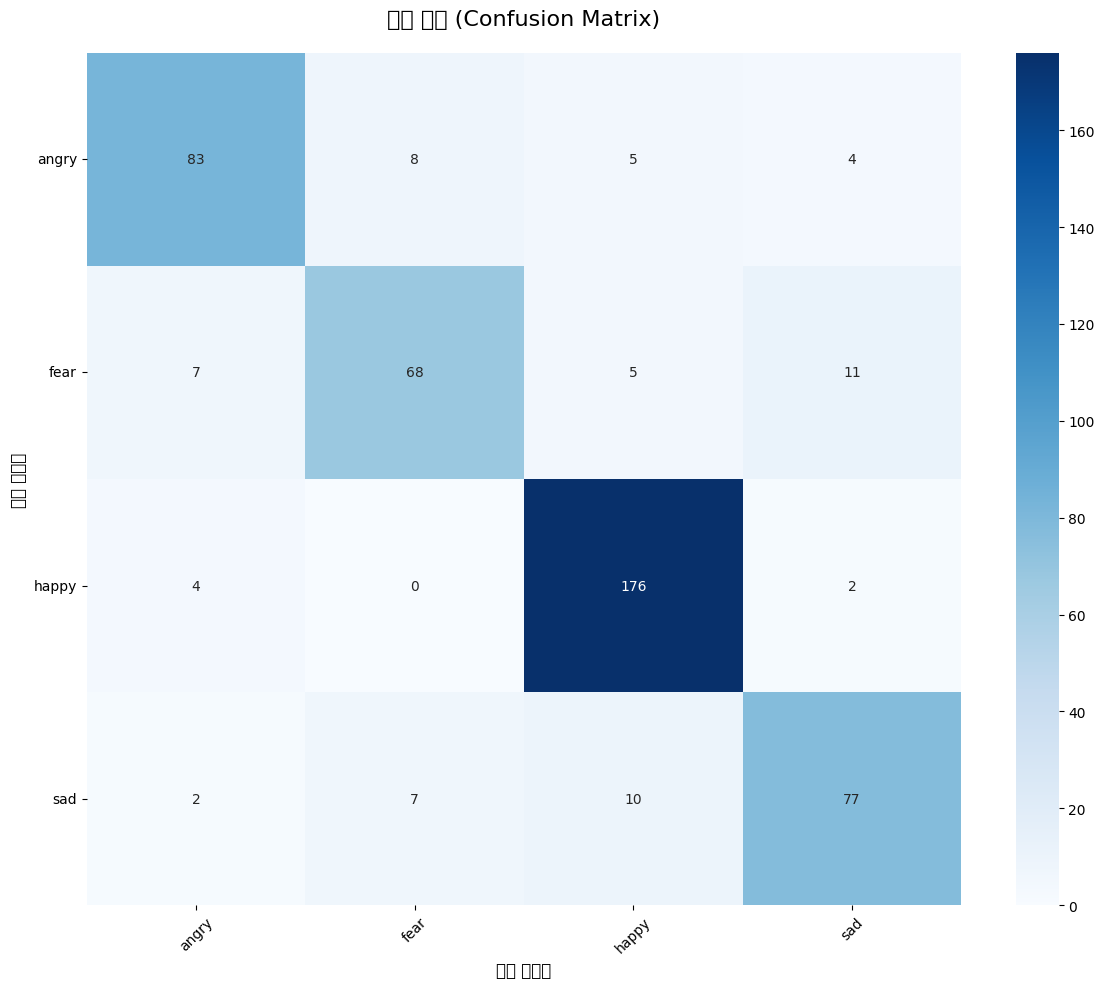

/tmp/ipykernel_108298/4166252132.py:141: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:141: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:141: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:141: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



📊 클래스별 성능 시각화
--------------------------------------------------


/tmp/ipykernel_108298/4166252132.py:141: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:141: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_108298/4166252132.py:141: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from

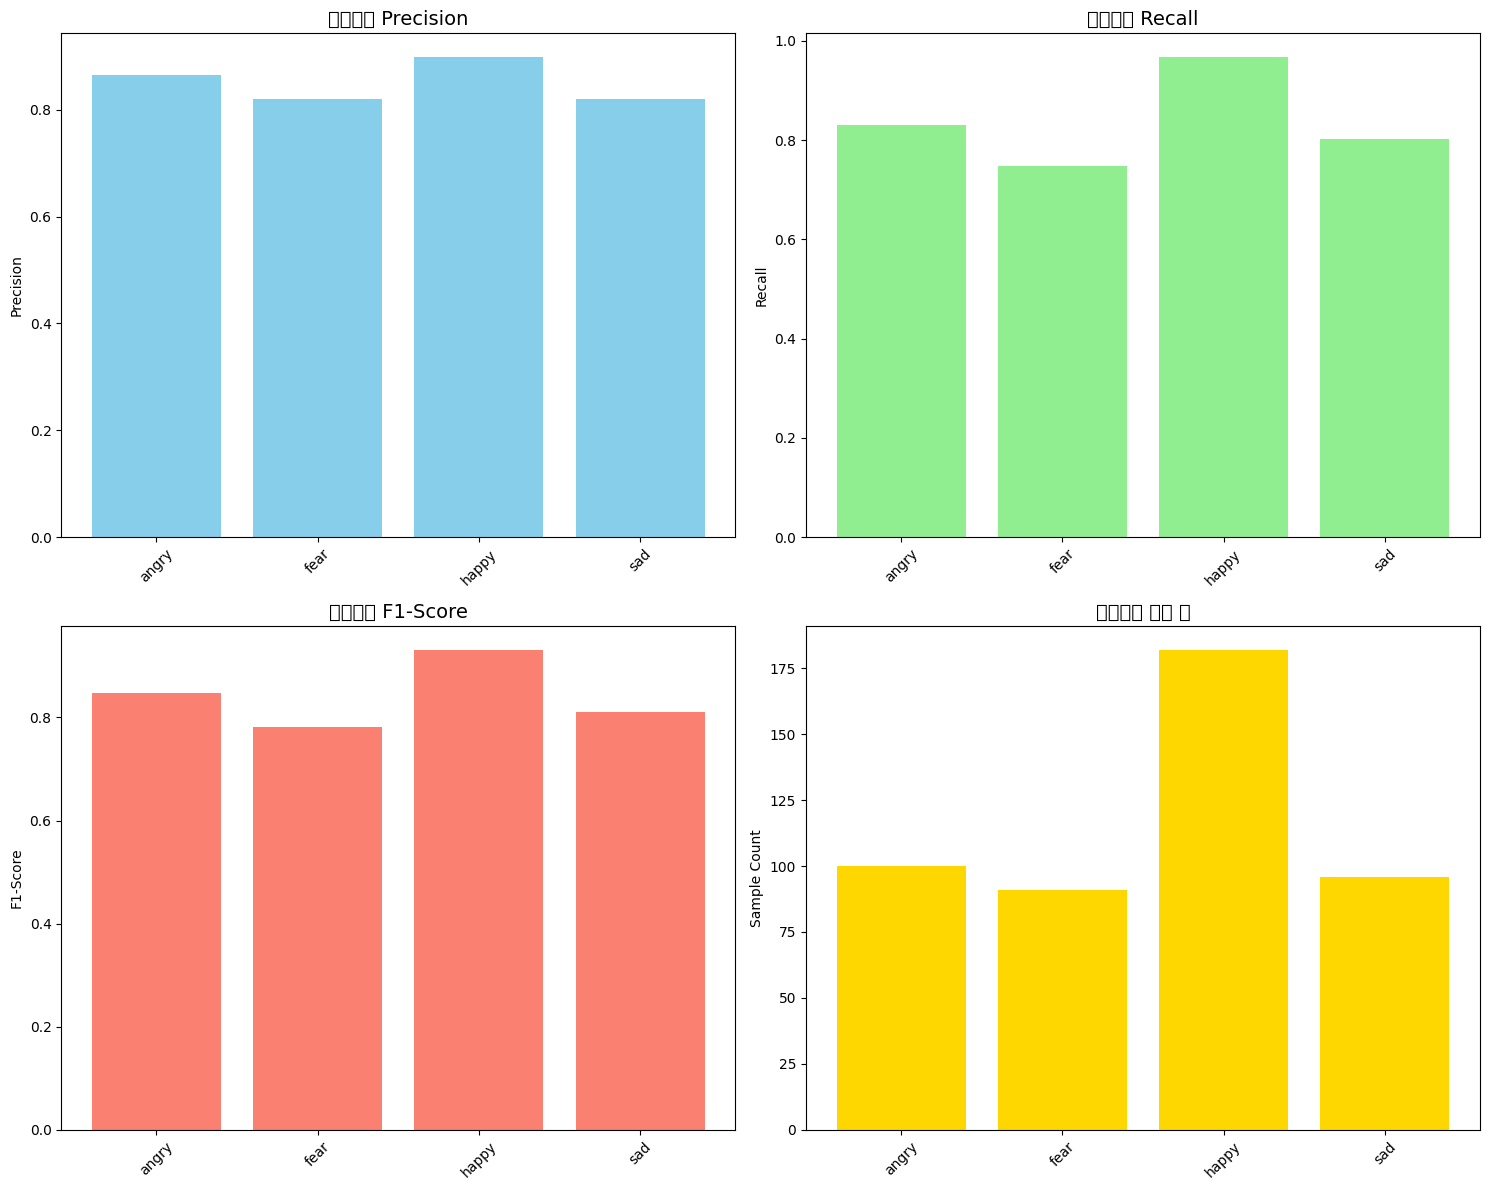


🎯 신뢰도 분석
--------------------------------------------------
📊 신뢰도 통계:
   평균: 0.914
   표준편차: 0.139
   최솟값: 0.371
   최댓값: 1.000
   중앙값: 0.988


/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47280 (\N{HANGUL SYLLABLE ROE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.

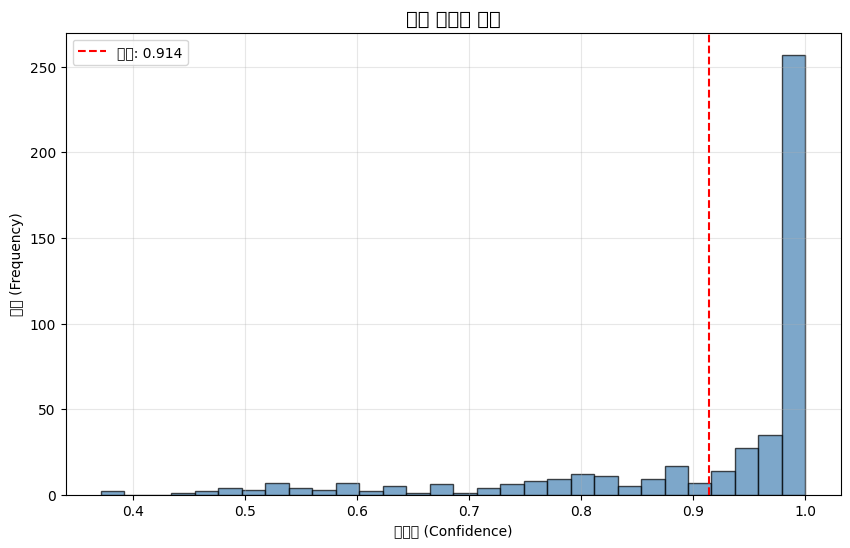


📋 최종 성능 요약 리포트
              지표      값    백분율
             정확도 0.8614 86.14%
매크로 평균 Precision 0.8502 85.02%
   매크로 평균 Recall 0.8366 83.66%
 매크로 평균 F1-Score 0.8426 84.26%
 가중 평균 Precision 0.8594 85.94%
    가중 평균 Recall 0.8614 86.14%
  가중 평균 F1-Score 0.8595 85.95%

❌ 오분류 사례 분석
--------------------------------------------------
🔍 총 오분류 사례: 65개

🚨 고신뢰도 오분류 사례 (상위 5개):
   1. 실제: fear → 예측: sad (신뢰도: 1.000)
   2. 실제: angry → 예측: sad (신뢰도: 1.000)
   3. 실제: fear → 예측: angry (신뢰도: 1.000)
   4. 실제: angry → 예측: sad (신뢰도: 0.999)
   5. 실제: fear → 예측: sad (신뢰도: 0.998)

🔄 주요 혼동 클래스 쌍 (상위 5개):
   1. fear → sad: 11회
   2. sad → happy: 10회
   3. angry → fear: 8회
   4. fear → angry: 7회
   5. sad → fear: 7회

✅ 상세 성능 분석 완료!


In [4]:
# 필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# 한글 폰트 설정 (matplotlib에서 한글 표시를 위해)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("\n" + "="*80)
print("🔥 상세 성능 지표 분석 시작")
print("="*80)

# 예측 결과를 리스트로 변환
y_true = []
y_pred = []
y_pred_proba = []

for true_cls, results in class_results.items():
    for pred_info in results['predictions']:
        y_true.append(true_cls)
        y_pred.append(pred_info['predicted'])
        y_pred_proba.append(pred_info['confidence'])

# 클래스 리스트 생성
classes = sorted(list(set(y_true + y_pred)))
print(f"📋 분석할 클래스: {classes}")

# 1. 기본 성능 지표 계산
print(f"\n📊 기본 성능 지표")
print("-" * 50)

# 전체 정확도
accuracy = accuracy_score(y_true, y_pred)
print(f"🎯 정확도 (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")

# 매크로 평균 지표
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print(f"🔍 매크로 평균 Precision: {macro_precision:.4f}")
print(f"🔍 매크로 평균 Recall: {macro_recall:.4f}")
print(f"🔍 매크로 평균 F1-Score: {macro_f1:.4f}")

# 가중 평균 지표
weighted_precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
weighted_recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
weighted_f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f"⚖️  가중 평균 Precision: {weighted_precision:.4f}")
print(f"⚖️  가중 평균 Recall: {weighted_recall:.4f}")
print(f"⚖️  가중 평균 F1-Score: {weighted_f1:.4f}")

# 2. 클래스별 상세 성능 지표
print(f"\n📈 클래스별 상세 성능 지표")
print("-" * 50)

# sklearn의 classification_report 사용
report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

print(f"{'클래스':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 65)

for class_name in classes:
    if class_name in report:
        precision = report[class_name]['precision']
        recall = report[class_name]['recall']
        f1 = report[class_name]['f1-score']
        support = report[class_name]['support']
        
        print(f"{class_name:<15} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f} {support:<10.0f}")

# 3. 혼동 행렬 생성 및 시각화
print(f"\n🔍 혼동 행렬 (Confusion Matrix)")
print("-" * 50)

cm = confusion_matrix(y_true, y_pred, labels=classes)

# 혼동 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title('혼동 행렬 (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('예측 클래스', fontsize=12)
plt.ylabel('실제 클래스', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. 클래스별 성능 시각화
print(f"\n📊 클래스별 성능 시각화")
print("-" * 50)

# 클래스별 지표를 데이터프레임으로 정리
class_metrics = []
for class_name in classes:
    if class_name in report:
        class_metrics.append({
            'Class': class_name,
            'Precision': report[class_name]['precision'],
            'Recall': report[class_name]['recall'],
            'F1-Score': report[class_name]['f1-score'],
            'Support': report[class_name]['support']
        })

metrics_df = pd.DataFrame(class_metrics)

# 바 차트로 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Precision
axes[0, 0].bar(metrics_df['Class'], metrics_df['Precision'], color='skyblue')
axes[0, 0].set_title('클래스별 Precision', fontsize=14)
axes[0, 0].set_ylabel('Precision')
axes[0, 0].tick_params(axis='x', rotation=45)

# Recall
axes[0, 1].bar(metrics_df['Class'], metrics_df['Recall'], color='lightgreen')
axes[0, 1].set_title('클래스별 Recall', fontsize=14)
axes[0, 1].set_ylabel('Recall')
axes[0, 1].tick_params(axis='x', rotation=45)

# F1-Score
axes[1, 0].bar(metrics_df['Class'], metrics_df['F1-Score'], color='salmon')
axes[1, 0].set_title('클래스별 F1-Score', fontsize=14)
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Support (샘플 수)
axes[1, 1].bar(metrics_df['Class'], metrics_df['Support'], color='gold')
axes[1, 1].set_title('클래스별 샘플 수', fontsize=14)
axes[1, 1].set_ylabel('Sample Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. 신뢰도 분석
print(f"\n🎯 신뢰도 분석")
print("-" * 50)

# 신뢰도 통계
confidence_stats = {
    'mean': np.mean(y_pred_proba),
    'std': np.std(y_pred_proba),
    'min': np.min(y_pred_proba),
    'max': np.max(y_pred_proba),
    'median': np.median(y_pred_proba)
}

print(f"📊 신뢰도 통계:")
print(f"   평균: {confidence_stats['mean']:.3f}")
print(f"   표준편차: {confidence_stats['std']:.3f}")
print(f"   최솟값: {confidence_stats['min']:.3f}")
print(f"   최댓값: {confidence_stats['max']:.3f}")
print(f"   중앙값: {confidence_stats['median']:.3f}")

# 신뢰도 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('예측 신뢰도 분포', fontsize=14)
plt.xlabel('신뢰도 (Confidence)')
plt.ylabel('빈도 (Frequency)')
plt.axvline(confidence_stats['mean'], color='red', linestyle='--', 
           label=f'평균: {confidence_stats["mean"]:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. 성능 요약 리포트
print(f"\n📋 최종 성능 요약 리포트")
print("=" * 80)

summary_data = {
    '지표': ['정확도', '매크로 평균 Precision', '매크로 평균 Recall', '매크로 평균 F1-Score',
            '가중 평균 Precision', '가중 평균 Recall', '가중 평균 F1-Score'],
    '값': [f"{accuracy:.4f}", f"{macro_precision:.4f}", f"{macro_recall:.4f}", 
          f"{macro_f1:.4f}", f"{weighted_precision:.4f}", f"{weighted_recall:.4f}", 
          f"{weighted_f1:.4f}"],
    '백분율': [f"{accuracy*100:.2f}%", f"{macro_precision*100:.2f}%", 
              f"{macro_recall*100:.2f}%", f"{macro_f1*100:.2f}%",
              f"{weighted_precision*100:.2f}%", f"{weighted_recall*100:.2f}%", 
              f"{weighted_f1*100:.2f}%"]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# 7. 오분류 상위 사례 분석
print(f"\n❌ 오분류 사례 분석")
print("-" * 50)

# 오분류된 사례들을 수집
misclassified = []
for i, (true_label, pred_label, confidence) in enumerate(zip(y_true, y_pred, y_pred_proba)):
    if true_label != pred_label:
        misclassified.append({
            'true_label': true_label,
            'pred_label': pred_label,
            'confidence': confidence,
            'index': i
        })

print(f"🔍 총 오분류 사례: {len(misclassified)}개")

if misclassified:
    # 신뢰도가 높은 오분류 사례 (모델이 확신했지만 틀린 경우)
    high_conf_errors = sorted(misclassified, key=lambda x: x['confidence'], reverse=True)[:5]
    
    print(f"\n🚨 고신뢰도 오분류 사례 (상위 5개):")
    for i, error in enumerate(high_conf_errors, 1):
        print(f"   {i}. 실제: {error['true_label']} → 예측: {error['pred_label']} "
              f"(신뢰도: {error['confidence']:.3f})")
    
    # 가장 많이 혼동되는 클래스 쌍 찾기
    confusion_pairs = {}
    for error in misclassified:
        pair = (error['true_label'], error['pred_label'])
        confusion_pairs[pair] = confusion_pairs.get(pair, 0) + 1
    
    top_confusions = sorted(confusion_pairs.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print(f"\n🔄 주요 혼동 클래스 쌍 (상위 5개):")
    for i, ((true_cls, pred_cls), count) in enumerate(top_confusions, 1):
        print(f"   {i}. {true_cls} → {pred_cls}: {count}회")

print(f"\n✅ 상세 성능 분석 완료!")
print("=" * 80)